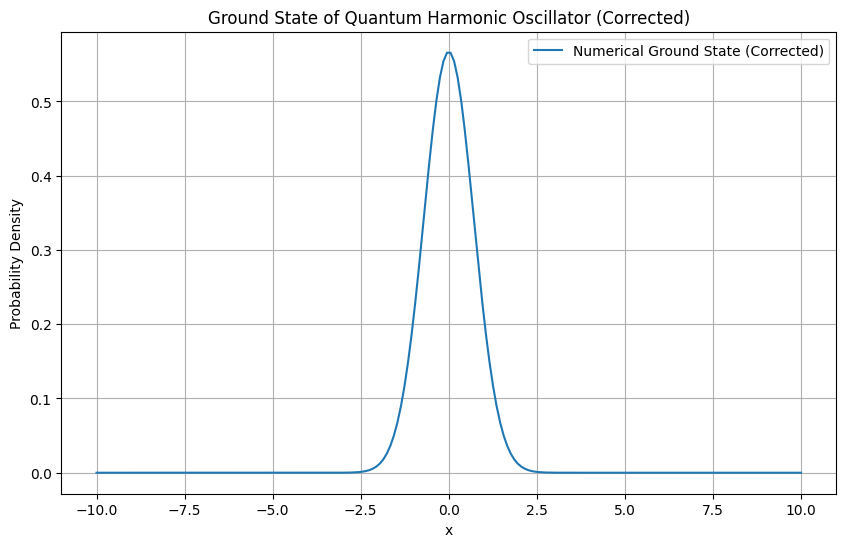

In [4]:
# Constants
dx = 0.1  # spatial step
dt = 0.0001  # time step, chosen to be small for stability
L = 10  # spatial domain [-L, L]
N = int(2 * L / dx)  # number of spatial points
x = np.linspace(-L, L, N)  # spatial grid

# Initial wave function: Gaussian centered at 0
sigma = 1.0  # width of the Gaussian
psi_0 = np.exp(-x**2 / (2 * sigma**2))
psi_0 /= np.sqrt(np.sum(np.abs(psi_0)**2) * dx)  # normalize

# FTCS Scheme Implementation
def FTCS_corrected(psi, V, dx, dt, N):
    # Constants for the scheme
    hbar = 1.0  # Planck's constant
    m = 1.0  # mass of the particle
    a = hbar**2 / (2 * m * dx**2)

    # Ensure psi is a complex array to handle complex values
    psi = psi.astype(complex)

    # Time evolution
    for _ in range(N):
        # FTCS update
        psi[1:-1] = psi[1:-1] - (1j * dt / hbar) * (
            -a * (psi[:-2] - 2 * psi[1:-1] + psi[2:]) + V[1:-1] * psi[1:-1]
        )

    return psi

# Recalculate using the corrected FTCS function
psi = psi_0.copy().astype(complex)  # ensure the initial psi is also complex
psi = FTCS_corrected(psi, V, dx, dt, time_steps)

# Plot the corrected wave function
plt.figure(figsize=(10, 6))
plt.plot(x, np.abs(psi)**2, label="Numerical Ground State (Corrected)")
plt.xlabel("x")
plt.ylabel("Probability Density")
plt.title("Ground State of Quantum Harmonic Oscillator (Corrected)")
plt.legend()
plt.grid(True)
plt.show()

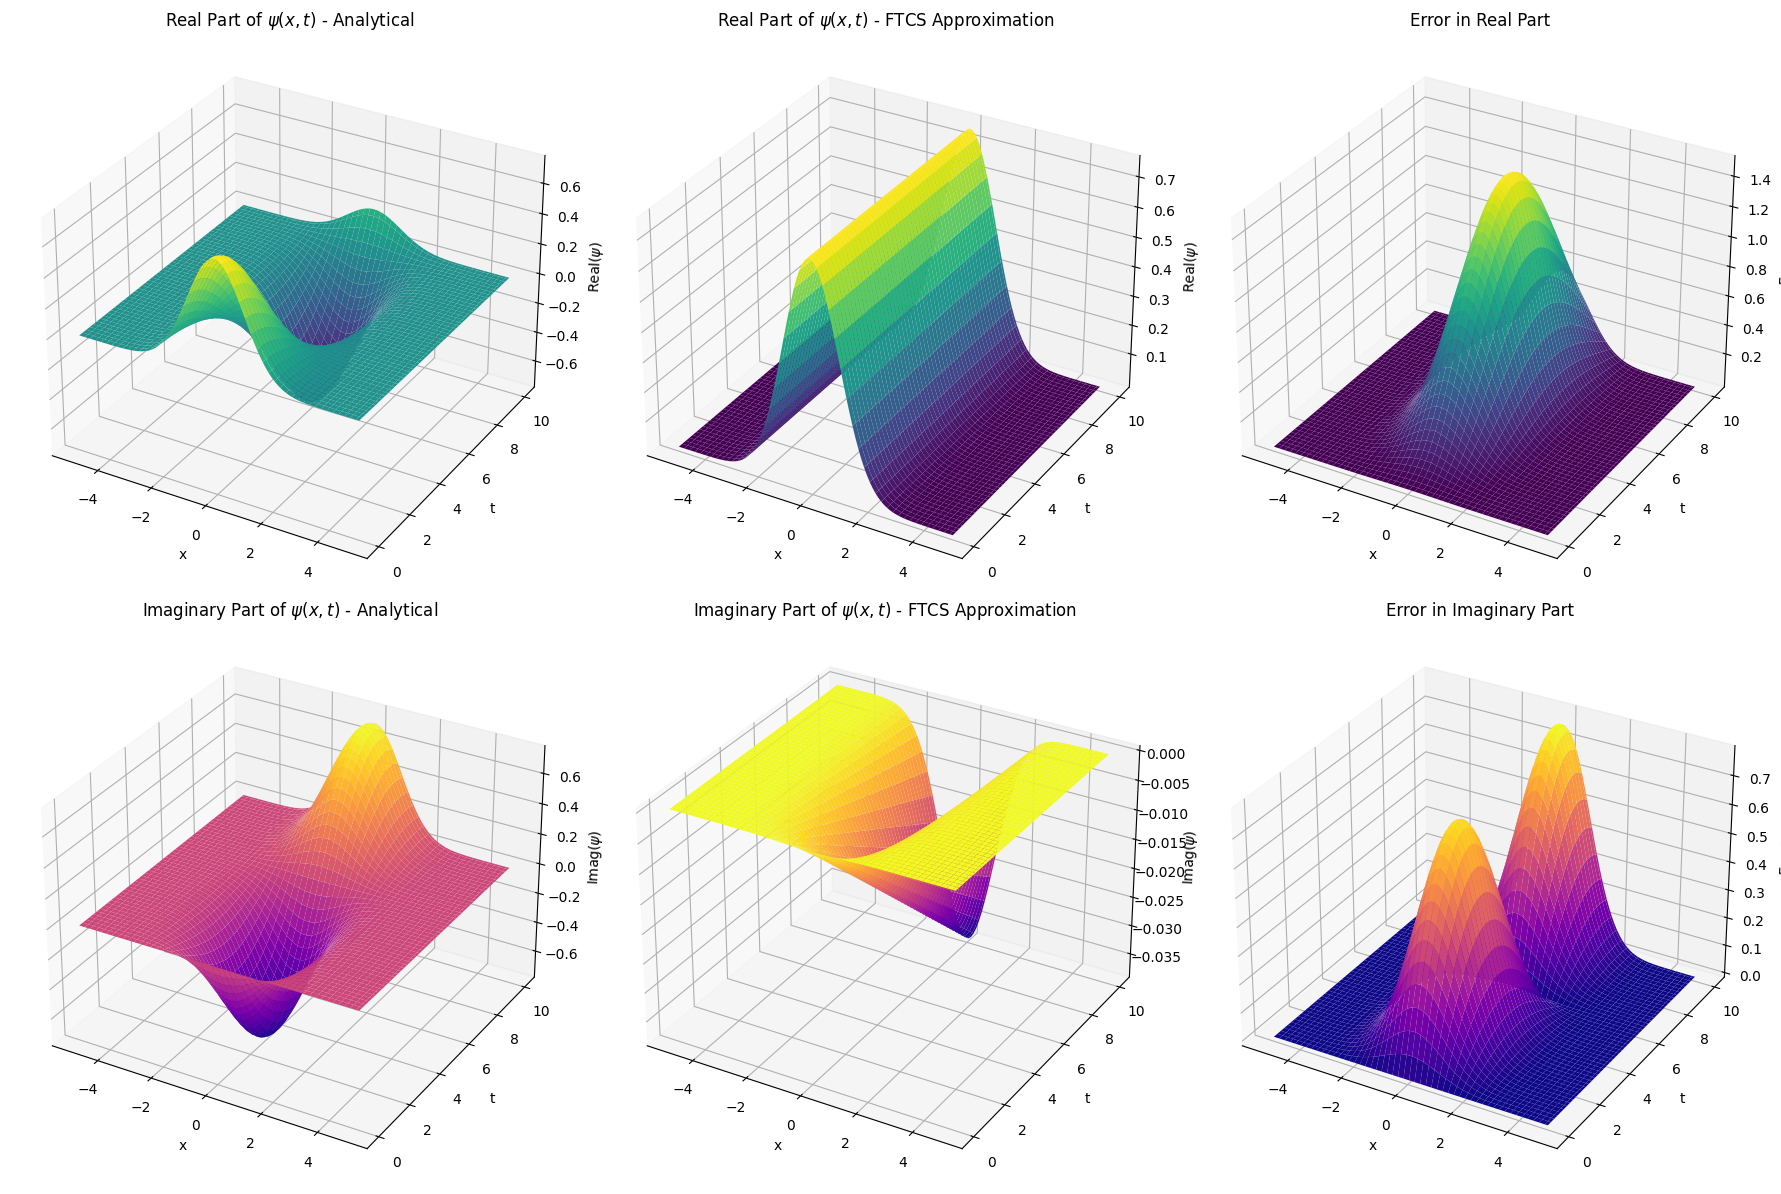

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.special as sp

# Redefining necessary functions and constants

# Constants for spatial and temporal discretization
dx = 0.1
dt = 0.001
sigma = 1.0

# Potential V(x) = 1/2 * x^2
def potential(x):
    return 0.5 * x**2

# FTCS Scheme Implementation (Corrected for complex values)
def FTCS_corrected(psi, V, dx, dt, N):
    hbar = 1.0
    m = 1.0
    a = hbar**2 / (2 * m * dx**2)
    psi = psi.astype(complex)

    for _ in range(N):
        psi[1:-1] = psi[1:-1] - (1j * dt / hbar) * (
            -a * (psi[:-2] - 2 * psi[1:-1] + psi[2:]) + V[1:-1] * psi[1:-1]
        )
    return psi

# Function to calculate psi_n(x, t) for the nth eigenstate
def psi_n_ana(n, x, t, m=1, omega=1, hbar=1):
    # Energy level
    E_n = hbar * omega * (n + 0.5)
    # Time-dependent factor
    time_factor = np.exp(-1j * E_n * t / hbar)

    # Spatial wave function
    norm_factor = (m * omega / (np.pi * hbar))**0.25 / np.sqrt(2**n * np.math.factorial(n))
    hermite_poly = sp.hermite(n)
    spatial_wave_function = hermite_poly(np.sqrt(m * omega / hbar) * x) * np.exp(-m * omega * x**2 / (2 * hbar))

    return norm_factor * spatial_wave_function * time_factor

# Preparing the meshgrid data
x_new = np.linspace(-5, 5, 100)
t_new = np.linspace(0, 10, 100)
X_new, T_new = np.meshgrid(x_new, t_new)

# Function to compute the FTCS solution over a grid
def compute_FTCS_over_grid(x, t, dx, dt, psi_0, V):
    psi_grid = np.zeros((len(t), len(x)), dtype=complex)
    psi = psi_0.copy()

    for i, t_val in enumerate(t):
        psi = FTCS_corrected(psi, V, dx, dt, 1)  # evolve one time step
        psi_grid[i, :] = psi

    return psi_grid

# Recalculating the potential V for the new x range
V_new = potential(x_new)

# New initial wave function for the expanded x range
psi_0_new = np.exp(-x_new**2 / (2 * sigma**2))
psi_0_new /= np.sqrt(np.sum(np.abs(psi_0_new)**2) * dx)  # normalize

# Computing the FTCS solution
psi_ftcs_grid = compute_FTCS_over_grid(x_new, t_new, dx, dt, psi_0_new, V_new)

# Computing the analytical solution
psi_analytical_grid = np.array([psi_n_ana(0, x_new, t_val) for t_val in t_new])

# Compute the error
psi_ftcs_real = np.real(psi_ftcs_grid)
psi_ftcs_imag = np.imag(psi_ftcs_grid)
psi_analytical_real = np.real(psi_analytical_grid)
psi_analytical_imag = np.imag(psi_analytical_grid)
# Calculating the error between the analytical solution and FTCS approximation
error_real = np.abs(psi_analytical_real - psi_ftcs_real)
error_imag = np.abs(psi_analytical_imag - psi_ftcs_imag)

# Plotting with error figures
fig = plt.figure(figsize=(18, 12))

# Real part of analytical solution
ax1 = fig.add_subplot(2, 3, 1, projection='3d')
surf1 = ax1.plot_surface(X_new, T_new, psi_analytical_real, cmap='viridis')
ax1.set_title('Real Part of $\psi(x,t)$ - Analytical')
ax1.set_xlabel('x')
ax1.set_ylabel('t')
ax1.set_zlabel('Real($\psi$)')

# Real part of FTCS approximation
ax2 = fig.add_subplot(2, 3, 2, projection='3d')
surf2 = ax2.plot_surface(X_new, T_new, psi_ftcs_real, cmap='viridis')
ax2.set_title('Real Part of $\psi(x,t)$ - FTCS Approximation')
ax2.set_xlabel('x')
ax2.set_ylabel('t')
ax2.set_zlabel('Real($\psi$)')

# Error in real part
ax5 = fig.add_subplot(2, 3, 3, projection='3d')
surf5 = ax5.plot_surface(X_new, T_new, error_real, cmap='viridis')
ax5.set_title('Error in Real Part')
ax5.set_xlabel('x')
ax5.set_ylabel('t')
ax5.set_zlabel('Error')

# Imaginary part of analytical solution
ax3 = fig.add_subplot(2, 3, 4, projection='3d')
surf3 = ax3.plot_surface(X_new, T_new, psi_analytical_imag, cmap='plasma')
ax3.set_title('Imaginary Part of $\psi(x,t)$ - Analytical')
ax3.set_xlabel('x')
ax3.set_ylabel('t')
ax3.set_zlabel('Imag($\psi$)')

# Imaginary part of FTCS approximation
ax4 = fig.add_subplot(2, 3, 5, projection='3d')
surf4 = ax4.plot_surface(X_new, T_new, psi_ftcs_imag, cmap='plasma')
ax4.set_title('Imaginary Part of $\psi(x,t)$ - FTCS Approximation')
ax4.set_xlabel('x')
ax4.set_ylabel('t')
ax4.set_zlabel('Imag($\psi$)')

# Error in imaginary part
ax6 = fig.add_subplot(2, 3, 6, projection='3d')
surf6 = ax6.plot_surface(X_new, T_new, error_imag, cmap='plasma')
ax6.set_title('Error in Imaginary Part')
ax6.set_xlabel('x')
ax6.set_ylabel('t')
ax6.set_zlabel('Error')

plt.tight_layout()
plt.show()

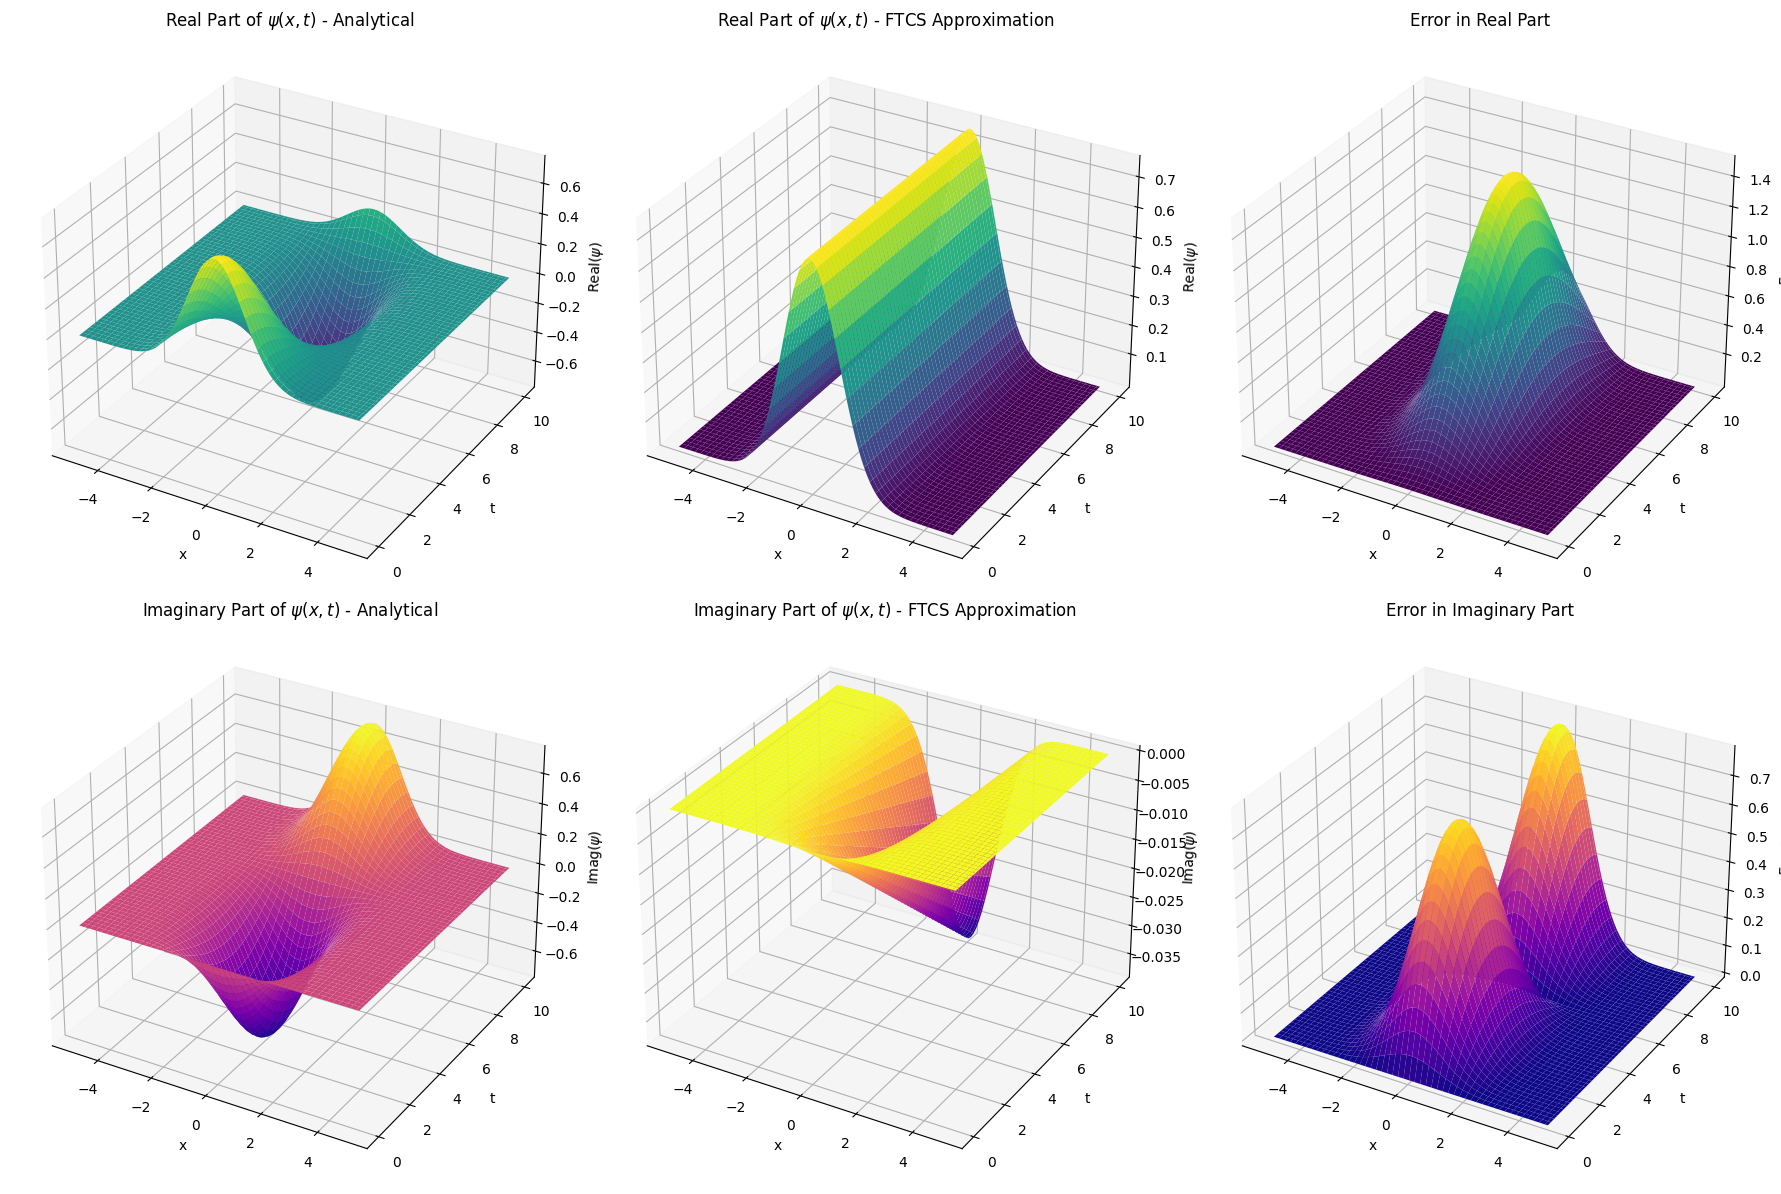

In [17]:
# Plotting
fig, axs = plt.subplots(1, 3, figsize=(21, 6))

# Analytical Solution Plot
c = axs[0].pcolormesh(X_new, T_new, psi_analytical_real, shading='auto')
axs[0].set_title('Analytical Solution')
axs[0].set_xlabel('x')
axs[0].set_ylabel('t')
fig.colorbar(c, ax=axs[0])

# FTCS Approximation Plot
c = axs[1].pcolormesh(X_new, T_new, psi_ftcs_real, shading='auto')
axs[1].set_title('FTCS Approximation')
axs[1].set_xlabel('x')
axs[1].set_ylabel('t')
fig.colorbar(c, ax=axs[1])

# Error Plot
c = axs[2].pcolormesh(X_new, T_new, error, shading='auto')
axs[2].set_title('Error (Analytical - FTCS)')
axs[2].set_xlabel('x')
axs[2].set_ylabel('t')
fig.colorbar(c, ax=axs[2])

plt.show()

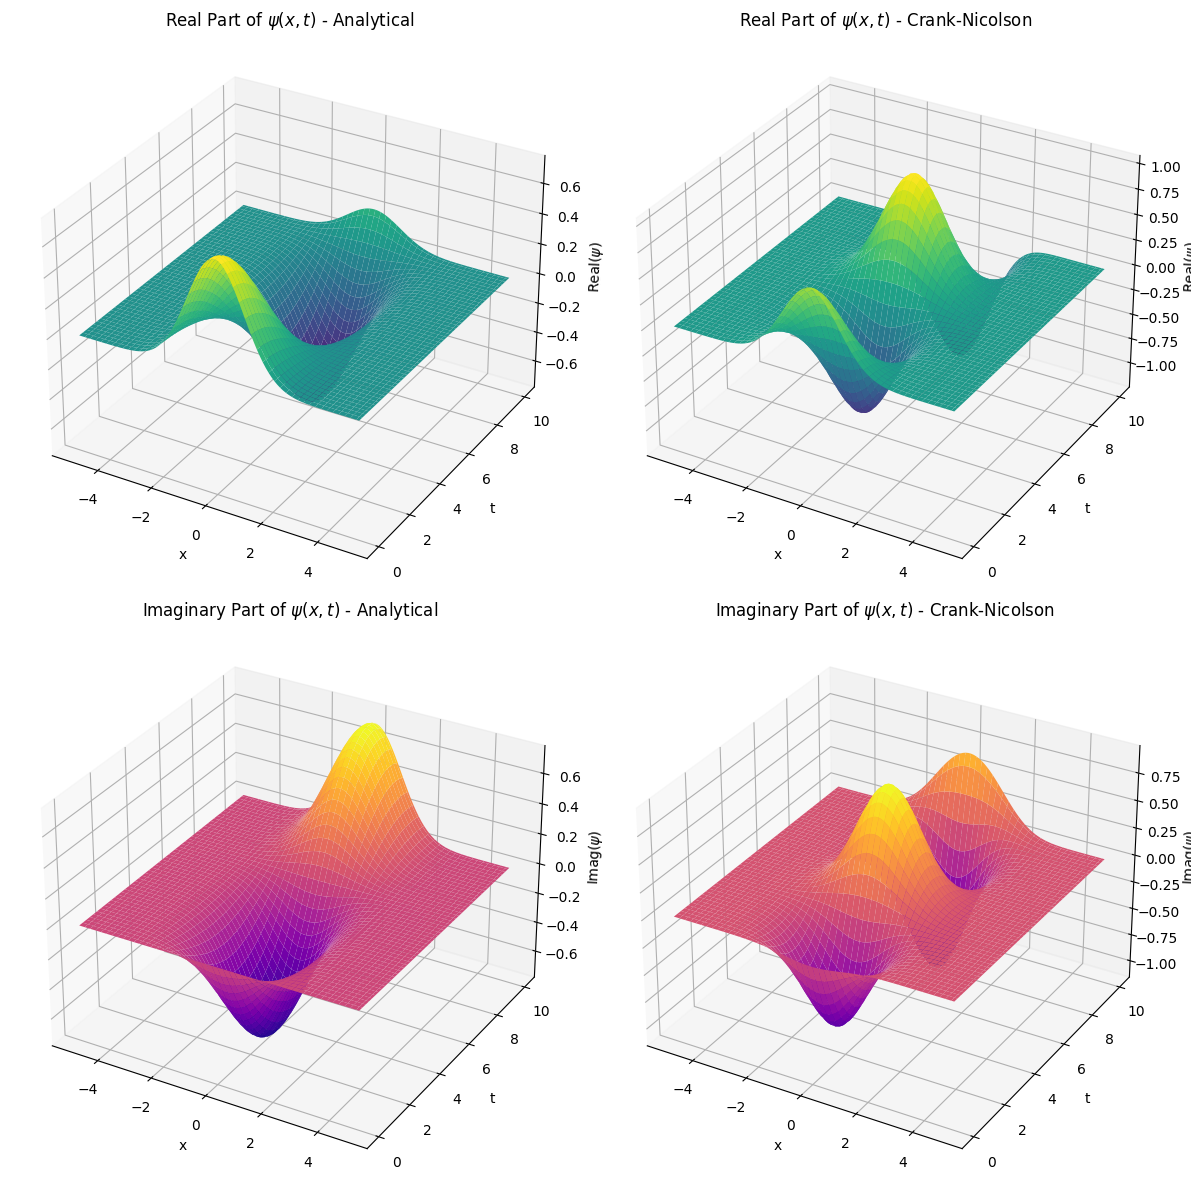

In [21]:
# Constants for spatial and temporal discretization
dx = 0.1
dt = 0.001
sigma = 1.0
hbar = 1.0  # Planck's constant
m = 1.0  # Mass

# Potential V(x) = 1/2 * x^2
def potential(x):
    return 0.5 * x**2

# Crank-Nicolson Scheme Implementation
def Crank_Nicolson(psi, V, dx, dt, hbar=1.0, m=1.0):
    N = len(psi)
    a = (hbar**2) / (2 * m * dx**2)

    # Diagonal and off-diagonal elements of matrices
    diagonal = (1 + 1j * dt * a / hbar) + 1j * dt * V / hbar
    off_diagonal = -1j * dt * a / (2 * hbar)

    # Matrices A and B
    A = np.diag(diagonal) + np.diag([off_diagonal]*(N-1), -1) + np.diag([off_diagonal]*(N-1), 1)
    B = np.diag(np.conj(diagonal)) + np.diag([-np.conj(off_diagonal)]*(N-1), -1) + np.diag([-np.conj(off_diagonal)]*(N-1), 1)

    # Boundary conditions
    A[0, 0] = A[-1, -1] = 1
    B[0, 0] = B[-1, -1] = 1
    psi[0] = psi[-1] = 0

    # Time evolution
    for _ in range(1):
        b = B @ psi
        psi = np.linalg.solve(A, b)

    return psi

# Function to calculate psi_n(x, t) for the nth eigenstate
def psi_n_ana(n, x, t, m=1, omega=1, hbar=1):
    E_n = hbar * omega * (n + 0.5)
    time_factor = np.exp(-1j * E_n * t / hbar)
    norm_factor = (m * omega / (np.pi * hbar))**0.25 / np.sqrt(2**n * np.math.factorial(n))
    hermite_poly = sp.hermite(n)
    spatial_wave_function = hermite_poly(np.sqrt(m * omega / hbar) * x) * np.exp(-m * omega * x**2 / (2 * hbar))
    return norm_factor * spatial_wave_function * time_factor

# Meshgrid for space and time
x_new = np.linspace(-5, 5, 100)
t_new = np.linspace(0, 10, 100)
X_new, T_new = np.meshgrid(x_new, t_new)

# Function to compute the Crank-Nicolson solution over a grid
def compute_CN_over_grid(x, t, dx, dt, psi_0, V):
    psi_grid = np.zeros((len(t), len(x)), dtype=complex)
    psi = psi_0.copy()

    for i, t_val in enumerate(t):
        psi = Crank_Nicolson(psi, V, dx, dt)
        psi_grid[i, :] = psi

    return psi_grid

# Initial wave function
psi_0_new = np.exp(-x_new**2 / (2 * sigma**2))
psi_0_new /= np.sqrt(np.sum(np.abs(psi_0_new)**2) * dx)  # Normalize

# Potential
V_new = potential(x_new)

# Computing the Crank-Nicolson and analytical solutions
psi_cn_grid = compute_CN_over_grid(x_new, t_new, dx, dt, psi_0_new, V_new)
psi_analytical_grid = np.array([psi_n_ana(0, x_new, t_val) for t_val in t_new])

# Extracting real and imaginary parts
psi_cn_real = np.real(psi_cn_grid)
psi_cn_imag = np.imag(psi_cn_grid)
psi_analytical_real = np.real(psi_analytical_grid)
psi_analytical_imag = np.imag(psi_analytical_grid)

# Calculating the error
error_real_cn = np.abs(psi_analytical_real - psi_cn_real)
error_imag_cn = np.abs(psi_analytical_imag - psi_cn_imag)

# Plotting
fig = plt.figure(figsize=(18, 12))

# Real part of analytical solution
ax1 = fig.add_subplot(2, 3, 1, projection='3d')
ax1.plot_surface(X_new, T_new, psi_analytical_real, cmap='viridis')
ax1.set_title('Real Part of $\psi(x,t)$ - Analytical')
ax1.set_xlabel('x')
ax1.set_ylabel('t')
ax1.set_zlabel('Real($\psi$)')

# Real part of Crank-Nicolson approximation
ax2 = fig.add_subplot(2, 3, 2, projection='3d')
ax2.plot_surface(X_new, T_new, psi_cn_real, cmap='viridis')
ax2.set_title('Real Part of $\psi(x,t)$ - Crank-Nicolson')
ax2.set_xlabel('x')
ax2.set_ylabel('t')
ax2.set_zlabel('Real($\psi$)')

# Imaginary part of analytical solution
ax3 = fig.add_subplot(2, 3, 4, projection='3d')
ax3.plot_surface(X_new, T_new, psi_analytical_imag, cmap='plasma')
ax3.set_title('Imaginary Part of $\psi(x,t)$ - Analytical')
ax3.set_xlabel('x')
ax3.set_ylabel('t')
ax3.set_zlabel('Imag($\psi$)')

# Imaginary part of Crank-Nicolson approximation
ax4 = fig.add_subplot(2, 3, 5, projection='3d')
ax4.plot_surface(X_new, T_new, psi_cn_imag, cmap='plasma')
ax4.set_title('Imaginary Part of $\psi(x,t)$ - Crank-Nicolson')
ax4.set_xlabel('x')
ax4.set_ylabel('t')
ax4.set_zlabel('Imag($\psi$)')

plt.tight_layout()
plt.show()

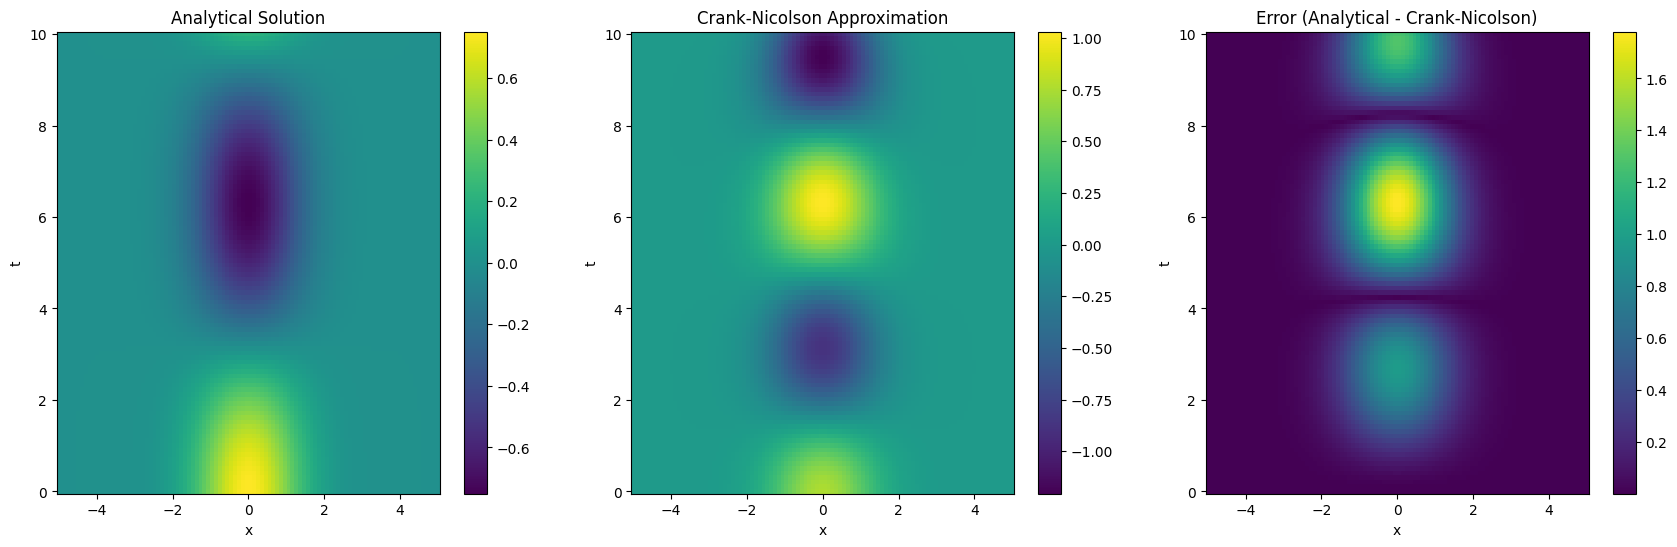

In [23]:
# Plotting the 2D meshgrid plots
fig, axs = plt.subplots(1, 3, figsize=(21, 6))

# Analytical Solution Plot
c = axs[0].pcolormesh(X_new, T_new, psi_analytical_real, shading='auto', cmap='viridis')
axs[0].set_title('Analytical Solution')
axs[0].set_xlabel('x')
axs[0].set_ylabel('t')
fig.colorbar(c, ax=axs[0])

# Crank-Nicolson Approximation Plot
c = axs[1].pcolormesh(X_new, T_new, psi_cn_real, shading='auto', cmap='viridis')
axs[1].set_title('Crank-Nicolson Approximation')
axs[1].set_xlabel('x')
axs[1].set_ylabel('t')
fig.colorbar(c, ax=axs[1])

# Error Plot
c = axs[2].pcolormesh(X_new, T_new, error_real_cn, shading='auto', cmap='viridis')
axs[2].set_title('Error (Analytical - Crank-Nicolson)')
axs[2].set_xlabel('x')
axs[2].set_ylabel('t')
fig.colorbar(c, ax=axs[2])

plt.show()